Installing Important Libraries for EDA

In [1]:
#!pip install pandas
#!pip install numpy
#!pip install scipy
#!pip install seaborn
#!pip install plotly
#!pip install --upgrade nbformat

Importing Fundamental Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import os

In [3]:
print(os.listdir())

['Benin_eda.ipynb', 'Sierraleone_eda.ipynb']


In [4]:
os.chdir("..")

Dataset Loading for Sierraleone 

In [5]:
df  = pd.read_csv('data/sierraleone-bumbuna.csv', parse_dates=["Timestamp"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

### Summary Statistics & Missing-Value Report

In [6]:
# Overview of numeric columns
print("The Description of the numeric columns:")
print(df.describe().T)

The Description of the numeric columns:
                  count                           mean                  min  \
Timestamp        525600  2022-04-30 12:00:30.000000768  2021-10-30 00:01:00   
GHI            525600.0                     201.957515                -19.5   
DNI            525600.0                     116.376337                 -7.8   
DHI            525600.0                     113.720571                -17.9   
ModA           525600.0                     206.643095                  0.0   
ModB           525600.0                     198.114691                  0.0   
Tamb           525600.0                      26.319394                 12.3   
RH             525600.0                      79.448857                  9.9   
WS             525600.0                       1.146113                  0.0   
WSgust         525600.0                       1.691606                  0.0   
WSstdev        525600.0                       0.363823                  0.0   
WD          

In [7]:
# Overview of all columns
print("---------------------------------")
print("The Description of all columns:")
print(df.describe(include='all'))

# Check for missing values
print("----------------------------------")
print("Check for missing values:")
print(df.isna().sum()/len(df)*100)

---------------------------------
The Description of all columns:
                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-30 12:00:30.000000768     201.957515     116.376337   
min              2021-10-30 00:01:00     -19.500000      -7.800000   
25%              2022-01-29 06:00:45      -2.800000      -0.300000   
50%              2022-04-30 12:00:30       0.300000      -0.100000   
75%              2022-07-30 18:00:15     362.400000     107.000000   
max              2022-10-30 00:00:00    1499.000000     946.000000   
std                              NaN     298.495150     218.652659   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      113.720571     206.643095     198.114691      26.319394   
min       -17.900000       0.000000       0.000000      12.300000   
25%        -3.800000       

In [8]:
# Missing values
null_report = df.isna().sum()
null_report[null_report > 0]

# Flagging columns with >5% nulls
threshold = 0.05 * len(df)
null_report[null_report > threshold]

Comments    525600
dtype: int64

### Outlier Detection & Basic Cleaning

In [9]:
# Columns of interest
cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]

# Compute Z-scores
z_scores = df[cols].apply(zscore)
outliers = (np.abs(z_scores) > 3).any(axis=1)

# Flag outliers
df["outlier_flag"] = outliers
print(f"Number of outlier samples flagged: {outliers.sum()}")

Number of outlier samples flagged: 16292


In [10]:
# Clean: drop or impute
df_clean = df.copy()
df_clean[cols] = df_clean[cols].fillna(df_clean[cols].median())
df_clean = df_clean[~df_clean["outlier_flag"]]

Export Cleaned Data

In [11]:
df_clean.to_csv("data/Sierraleone_clean.csv", index=False)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 509308 entries, 0 to 525599
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      509308 non-null  datetime64[ns]
 1   GHI            509308 non-null  float64       
 2   DNI            509308 non-null  float64       
 3   DHI            509308 non-null  float64       
 4   ModA           509308 non-null  float64       
 5   ModB           509308 non-null  float64       
 6   Tamb           509308 non-null  float64       
 7   RH             509308 non-null  float64       
 8   WS             509308 non-null  float64       
 9   WSgust         509308 non-null  float64       
 10  WSstdev        509308 non-null  float64       
 11  WD             509308 non-null  float64       
 12  WDstdev        509308 non-null  float64       
 13  BP             509308 non-null  int64         
 14  Cleaning       509308 non-null  int64         
 15  Preci

### Time Series Analysis

<Figure size 1200x500 with 0 Axes>

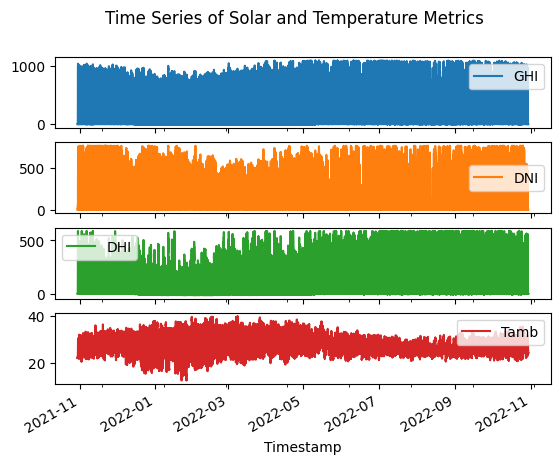

In [12]:
# Line plots
plt.figure(figsize=(12, 5))
df_clean.set_index("Timestamp")[["GHI", "DNI", "DHI", "Tamb"]].plot(subplots=True)
plt.suptitle("Time Series of Solar and Temperature Metrics")
plt.show()

### Cleaning Impact

Group by Cleaning flag and plot average ModA & ModB pre/post-clean

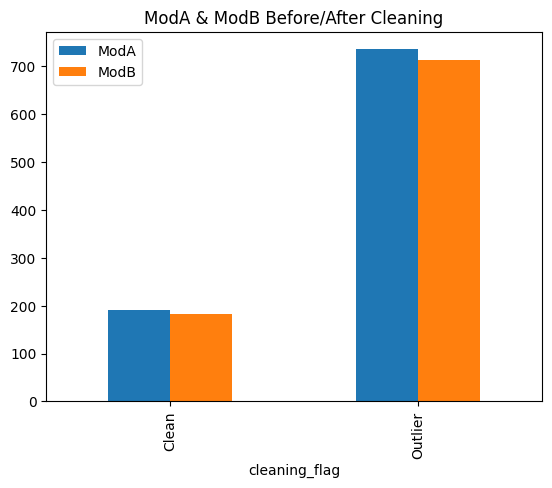

In [13]:
# Compare ModA/ModB before and after cleaning
df["cleaning_flag"] = np.where(df["outlier_flag"], "Outlier", "Clean")
df.groupby("cleaning_flag")[["ModA", "ModB"]].mean().plot(kind="bar")
plt.title("ModA & ModB Before/After Cleaning")
plt.show()

Correlation & Relationship Analysis

Heatmap Correlation

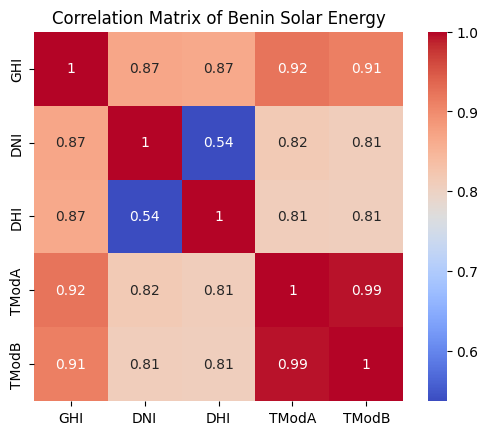

In [14]:
cor_cols = ["GHI", "DNI", "DHI", "TModA", "TModB"]

# Compute correlations
corr = df[cor_cols].corr()

# Visualize
sns.heatmap(corr, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Benin Solar Energy")
plt.show()

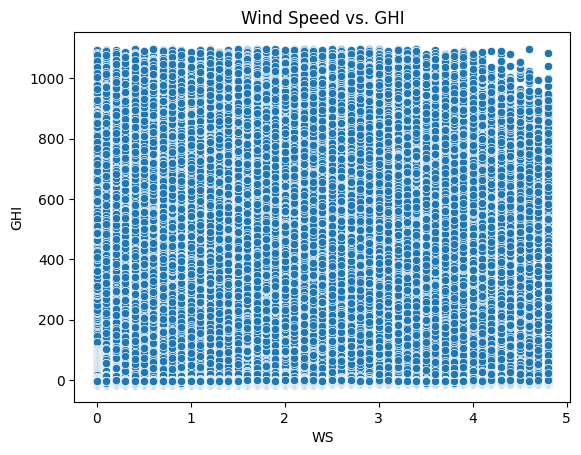

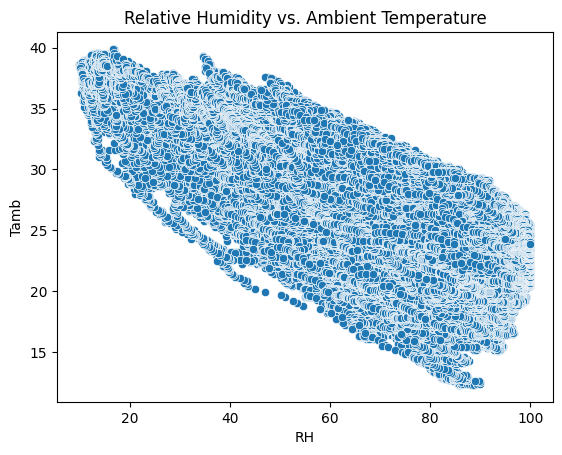

In [15]:
sns.scatterplot(x="WS", y="GHI", data=df_clean)
plt.title("Wind Speed vs. GHI")
plt.show()

sns.scatterplot(x="RH", y="Tamb", data=df_clean)
plt.title("Relative Humidity vs. Ambient Temperature")
plt.show()

### Wind & Distribution Analysis

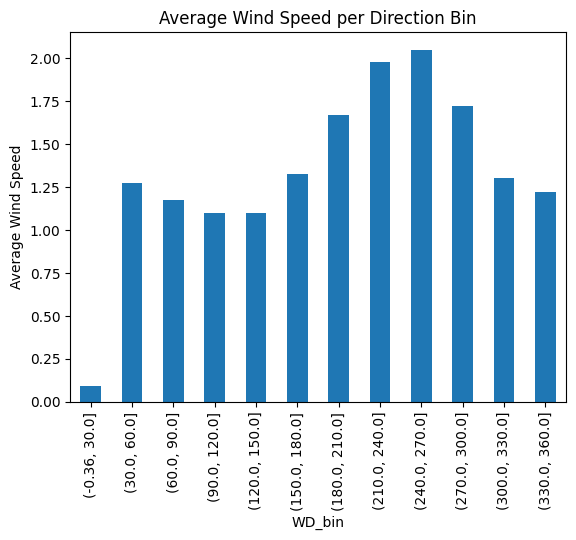

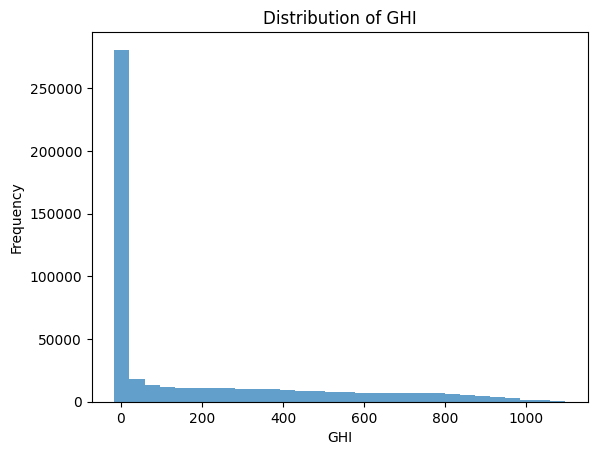

In [16]:
df_clean["WD_bin"] = pd.cut(df_clean["WD"], bins=12)
wind_counts = df_clean.groupby("WD_bin")["WS"].mean()

wind_counts.plot(kind="bar", title="Average Wind Speed per Direction Bin")
plt.ylabel("Average Wind Speed")
plt.show()

df_clean["GHI"].plot(kind="hist", bins=30, alpha=0.7)
plt.title("Distribution of GHI")
plt.xlabel("GHI")
plt.show()

### Temperature Analysis

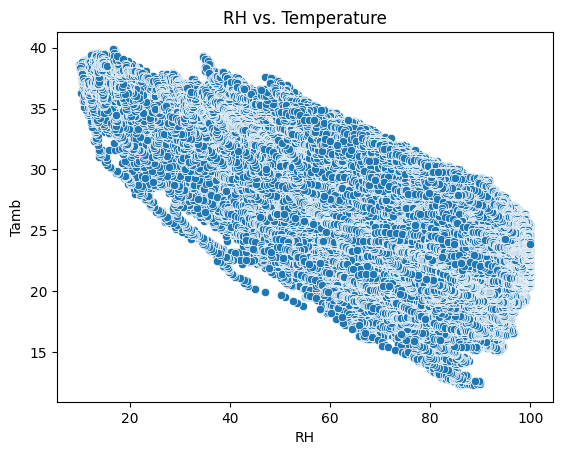

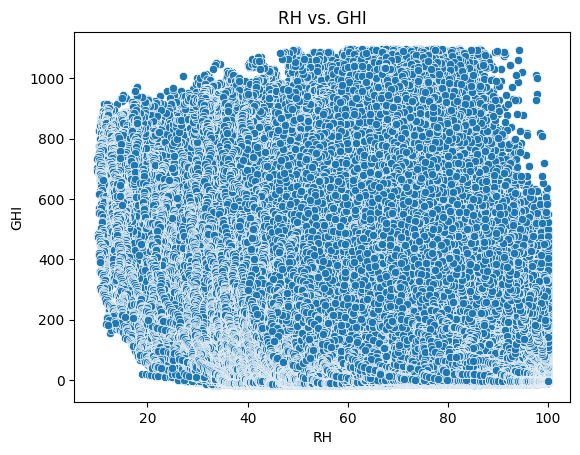

In [17]:
sns.scatterplot(x="RH", y="Tamb", data=df_clean)
plt.title("RH vs. Temperature")
plt.show()

sns.scatterplot(x="RH", y="GHI", data=df_clean)
plt.title("RH vs. GHI")
plt.show()

### Bubble Chart


GHI vs. Tamb with bubble size = RH or BP

In [18]:
fig = px.scatter(df_clean, x="GHI", y="Tamb", size="RH", color="RH",
                 title="GHI vs. Tamb (Bubble Size = RH)", size_max=30)
#fig.show()